<a href="https://colab.research.google.com/github/MasterDohko/-Curso-de-Fundamentos-de-Estadistica-y-Analisis-de-Datos-con-Python/blob/master/Tipos-Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import scipy.stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
#se recomienda usar esto para visualiar en tiempo real
#matplotlib.inline

In [8]:
from google.colab import files
uploaded = files.upload()

Saving bicicletas-compartidas.csv to bicicletas-compartidas (1).csv


In [12]:
df = pd.read_csv('bicicletas-compartidas.csv')

#### CATEGÓRICAS


In [13]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [10]:
y = df['cuartil-ano']
y

NameError: ignored

In [ ]:
y = df['cuartil-ano'].apply(lambda x: 'cuartil' + str(int(x)))
y

### DIAGRAMA DE BARRAS

Text(0, 0.5, 'Frecuencia')

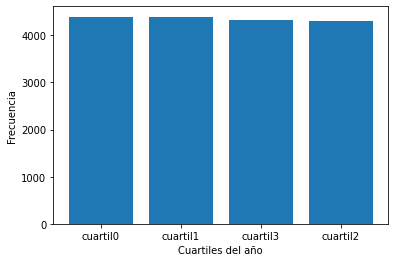

In [ ]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')

(4200.0, 4500.0)

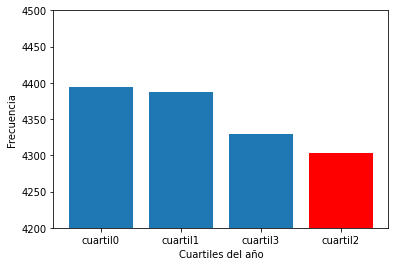

In [ ]:
fig, ax = plt.subplots()
ax.bar(y.value_counts().index, y.value_counts())
ax.set_xlabel('Cuartiles del año')
ax.set_ylabel('Frecuencia')
#colorear una barra en particular
ax.patches[3].set_facecolor('red')
#limitar el tamaño
plt.ylim(4200,4500)

### DIAGRAMA DE TORTA

Text(0.5, 1.0, 'Diagrama de torta')

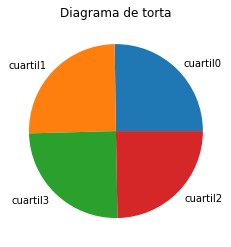

In [ ]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index)
ax.set_title('Diagrama de torta')

Text(0.5, 1.0, 'Diagrama de torta')

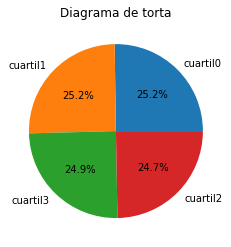

In [ ]:
fig, ax = plt.subplots()
ax.pie(y.value_counts(), labels = y.value_counts().index, autopct='%1.1f%%')
ax.set_title('Diagrama de torta')

##VARIABLES NUMERICAS

In [4]:
y = df['viento']

NameError: ignored

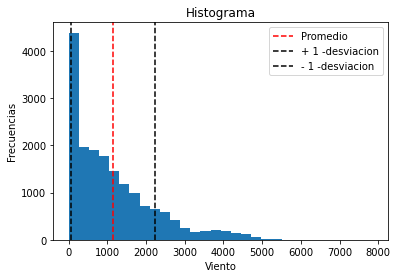

In [15]:
fig, ax = plt.subplots()
ax.hist(y, bins= 30)
ax.set_title('Histograma')
ax.set_xlabel('Viento')
ax.set_ylabel('Frecuencias')

#Funcion de posicion una linea vertical
plt.axvline(np.mean(y), c='r', linestyle='--', label='Promedio')
plt.axvline(np.mean(y) + np.std(y), c='k', linestyle='--', label='+ 1 -desviacion')
plt.axvline(np.mean(y) - np.std(y), c='k', linestyle='--', label='- 1 -desviacion')
ax.legend()
plt.show()

###VARIABLES NUMERICAS

Boxplot 
Tenemos la distribucion del diagrama:
- El minimo en cero
- El primer cuartil es donde inicia la caja
- El segundo cuartil o mediana la linea anaranjada
- El tercer cuartil el cierre de la caja
- Valor maximo y valores outliers 

Text(0.5, 1.0, 'Diagrama Caja')

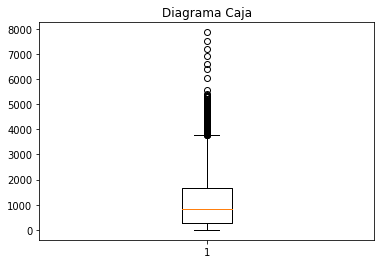

In [20]:
y = df['bicis-compartidas']

fig, ax = plt.subplots()
ax.boxplot(x = y)
ax.set_title('Diagrama Caja')


Text(0.5, 1.0, 'Diagrama Caja')

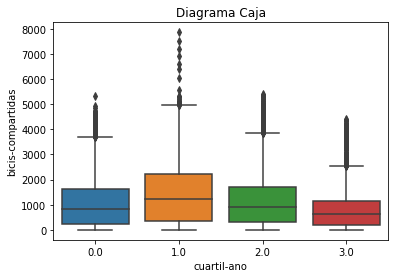

In [22]:
y = df['bicis-compartidas']

fig, ax = plt.subplots()
sns.boxplot(x = 'cuartil-ano', y = 'bicis-compartidas', data = df)
ax.set_title('Diagrama Caja')


### SCATTERPLOT

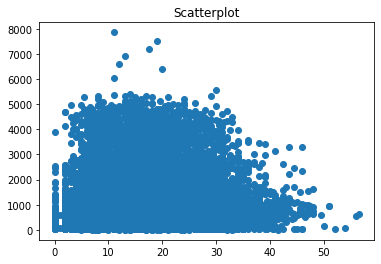

In [25]:
fig, ax = plt.subplots()
ax.set_title('Scatterplot')
ax.scatter(df['viento'], df['bicis-compartidas'])


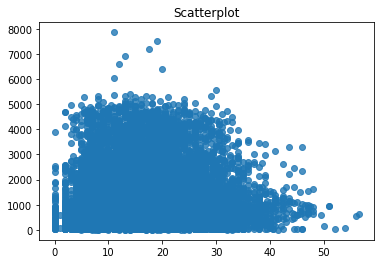

In [28]:
fig, ax = plt.subplots()
ax.set_title('Scatterplot')
#alpha permite difuminar cada uno de los puntos y permitir visualizar la concentracion de los datos
ax.scatter(df['viento'], df['bicis-compartidas'], alpha = 0.8)


Text(0, 0.5, 'Bicis-compartidas')

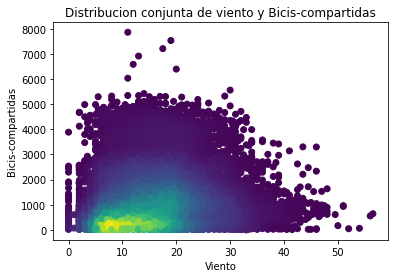

In [33]:
from scipy.stats import gaussian_kde
xy= np.vstack([df['viento'],df['bicis-compartidas']])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(df['viento'], df['bicis-compartidas'], c=z, label='viento vs bicis')
ax.set_title('Distribucion conjunta de viento y Bicis-compartidas')
ax.set_xlabel('Viento')
ax.set_ylabel('Bicis-compartidas')